In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('/Users/akashtiwari/Documents/Projects/Feynn Labs/Indian automoble buying behavour study 1.0.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [4]:
data.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [5]:
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [6]:
data.shape

(99, 13)

In [7]:
data.dtypes

Age                  int64
Profession          object
Marrital Status     object
Education           object
No of Dependents     int64
Personal loan       object
House Loan          object
Wife Working        object
Salary               int64
Wife Salary          int64
Total Salary         int64
Make                object
Price                int64
dtype: object

In [8]:
data.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

/var/folders/jm/jp15b4nx22l5qmk9kvd1tdhw0000gn/T/ipykernel_806/2388769933.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x], bins = 20)
/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/jm/jp15b4nx22l5qmk9kvd1tdhw0000gn/T/ipykernel_806/2388769933.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `d

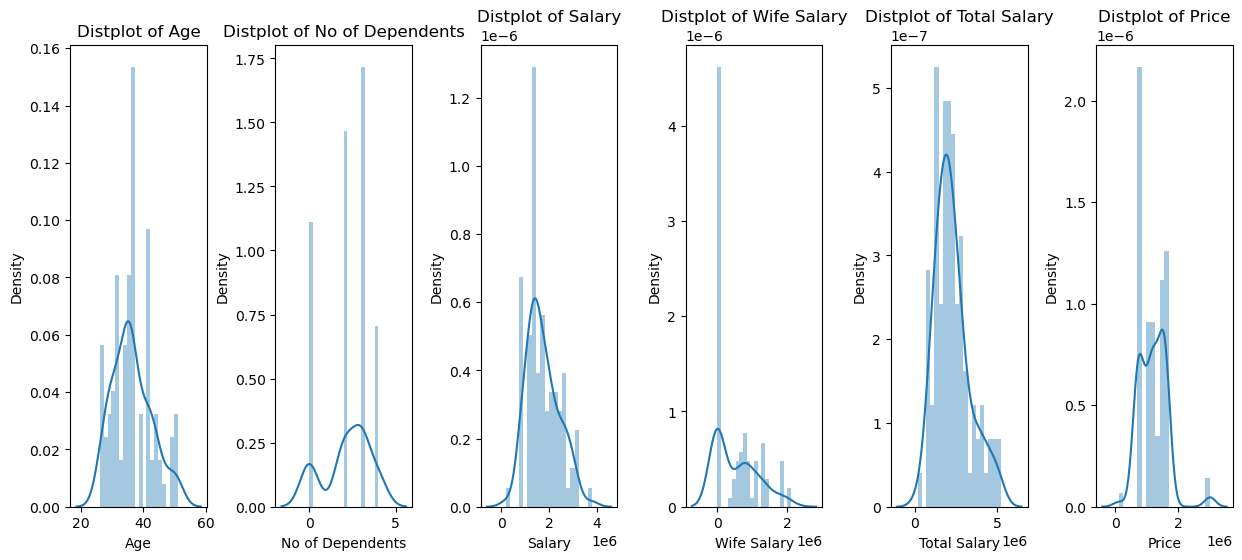

In [9]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'No of Dependents' ,'Salary'  ,'Wife Salary'  ,'Total Salary'  ,'Price']:
    n += 1
    plt.subplot(1,6,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(data[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

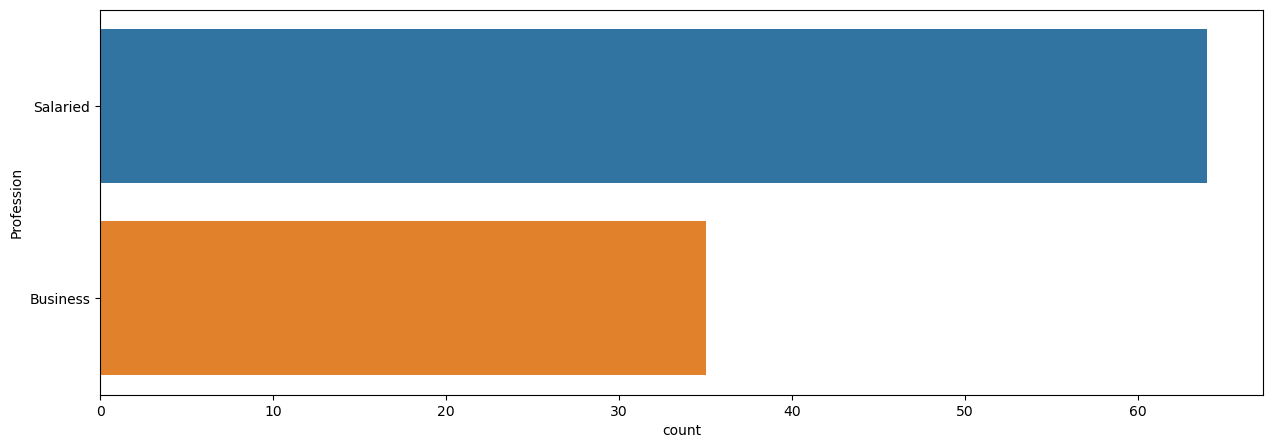

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(y='Profession',data=data)
plt.show()

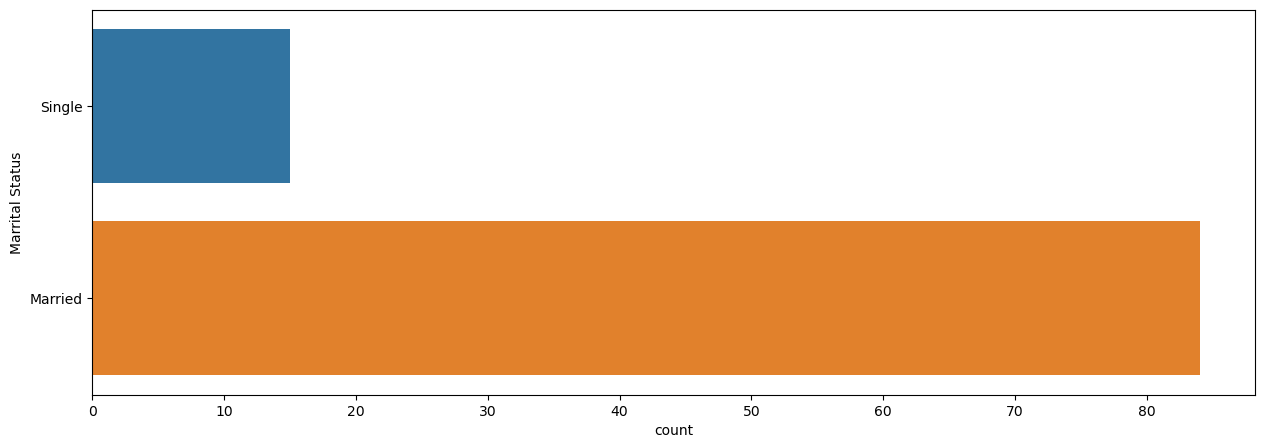

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(y='Marrital Status',data=data)
plt.show()

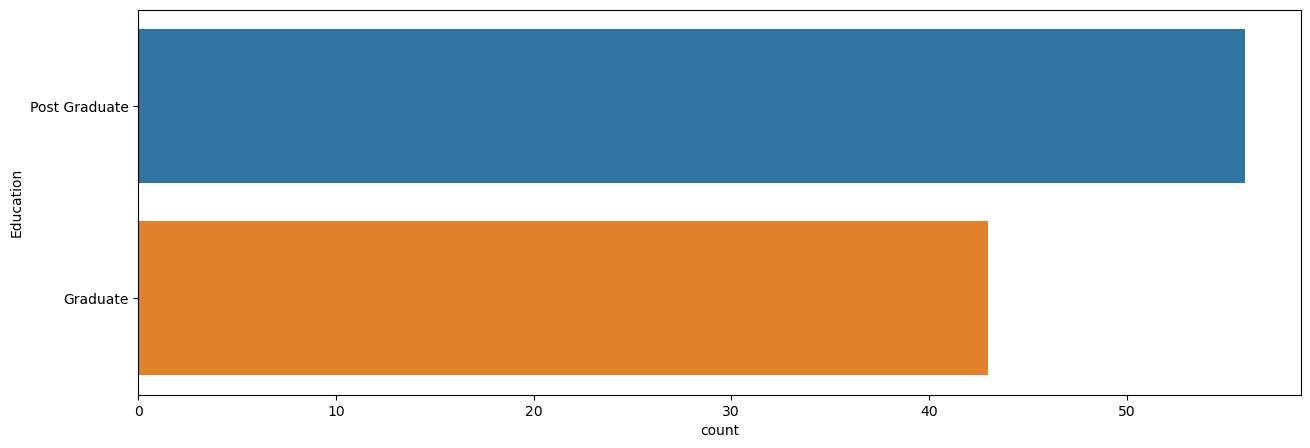

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(y='Education',data=data)
plt.show()

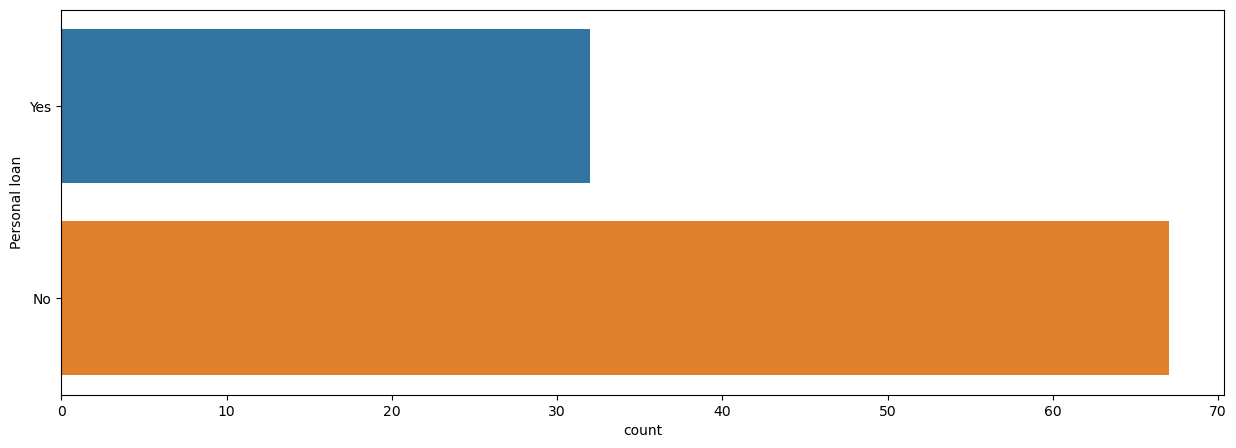

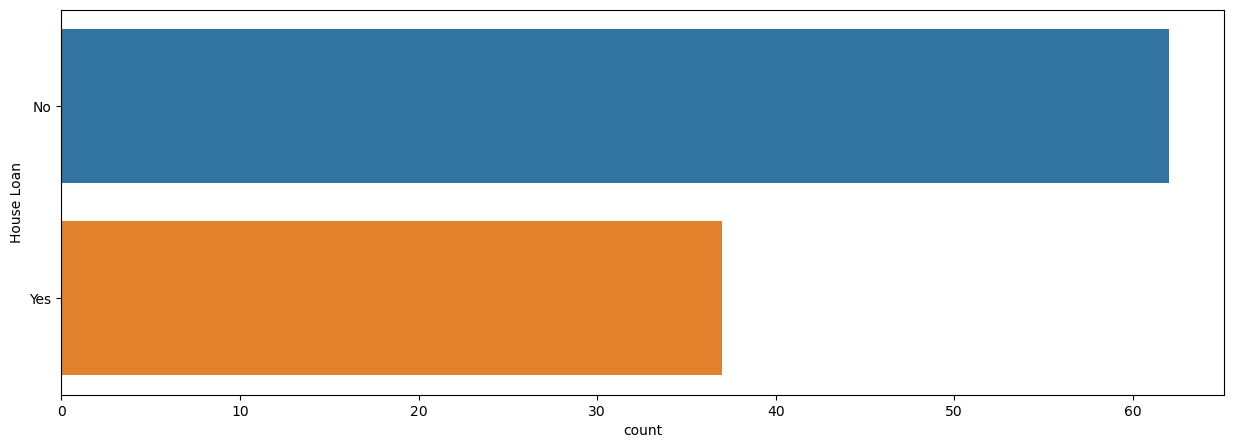

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(y='Personal loan',data=data)
plt.show()
plt.figure(figsize=(15,5))
sns.countplot(y='House Loan',data=data)
plt.show()

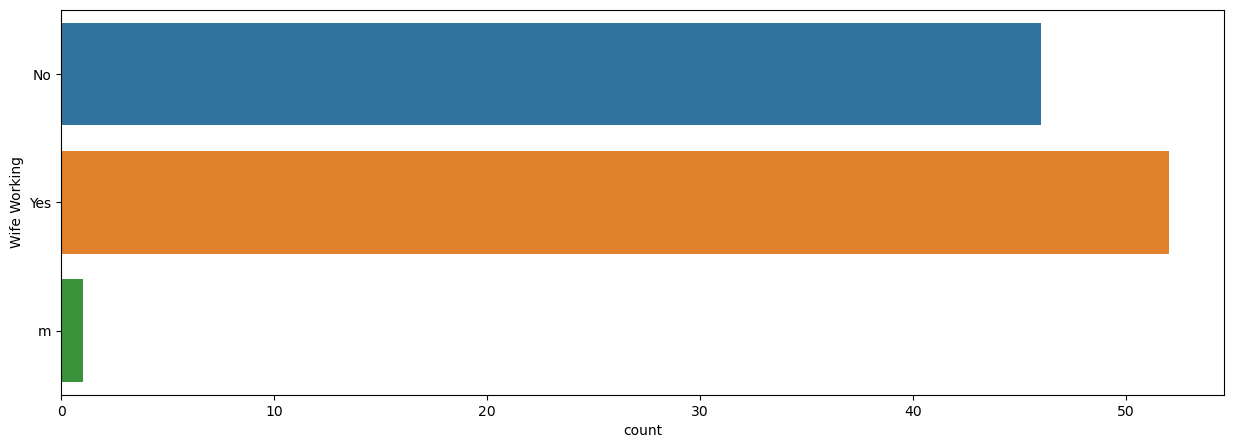

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(y='Wife Working',data=data)
plt.show()

correcting the column wife working from m to No

In [15]:
data.loc[data['Wife Working'] == 'm']  

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
11,35,Salaried,Married,Graduate,4,Yes,Yes,m,1400000,0,1400000,Baleno,700000


In [16]:
data=data.replace(to_replace ="m",value ="No")

In [17]:
data.head(15)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
5,28,Salaried,Married,Graduate,3,Yes,Yes,No,900000,0,900000,Baleno,700000
6,31,Salaried,Married,Graduate,4,No,No,Yes,1200000,600000,1800000,City,1200000
7,33,Business,Married,Post Graduate,4,No,No,No,1400000,0,1400000,Baleno,700000
8,34,Business,Married,Post Graduate,4,No,No,No,2000000,0,2000000,Verna,1100000
9,34,Salaried,Married,Graduate,3,Yes,Yes,Yes,1200000,700000,1900000,i20,800000


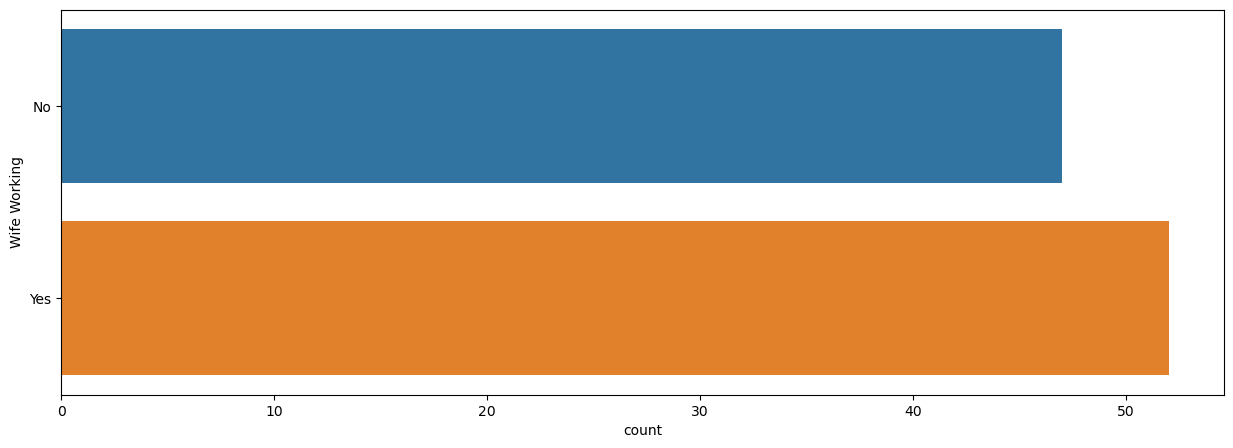

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(y='Wife Working',data=data)
plt.show()

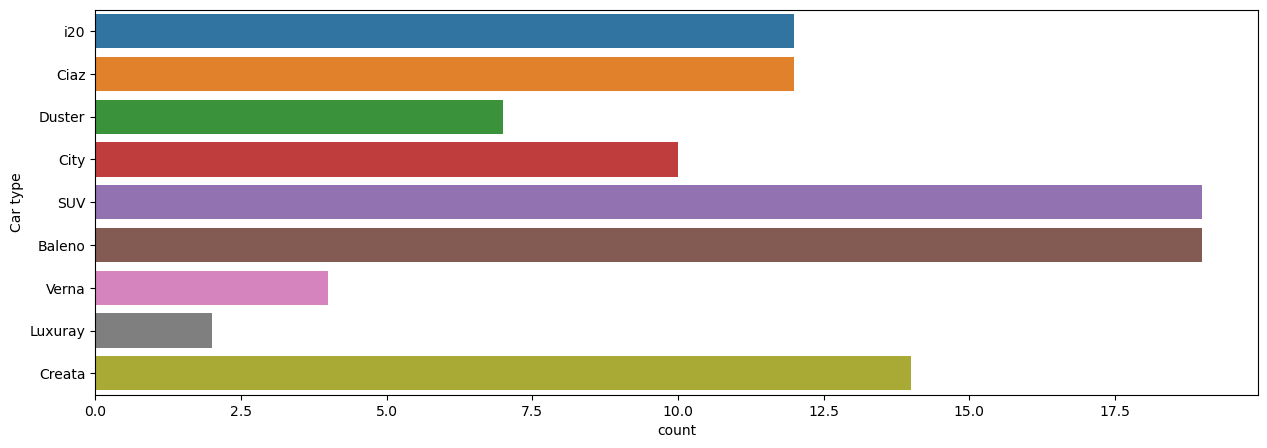

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(y='Make',data=data)
plt.ylabel('Car type')
plt.show()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


Text(0.5, 1.0, 'Heatmap of Selected Columns')

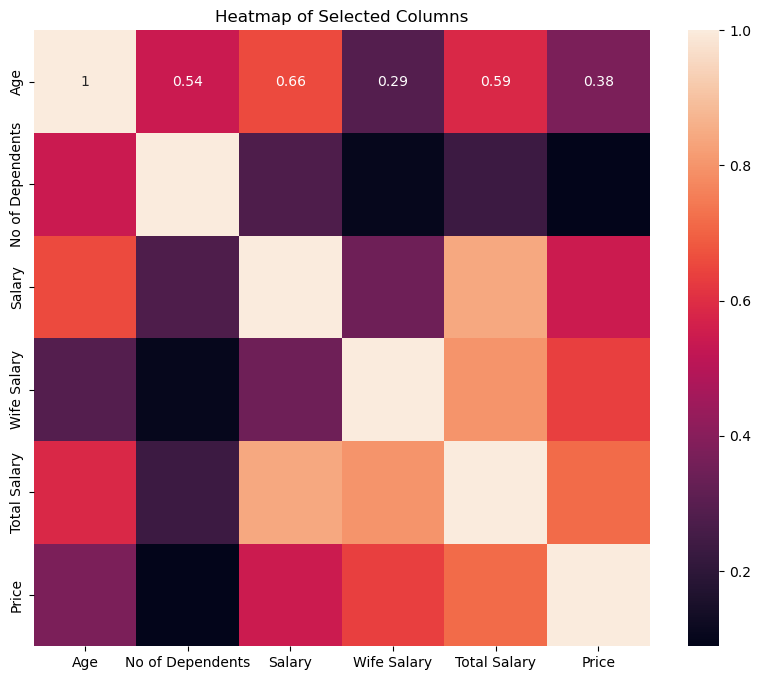

In [21]:
selected_columns = ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']
selected_data = data[selected_columns]

corr_matrix = selected_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, square=True)
plt.title('Heatmap of Selected Columns')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


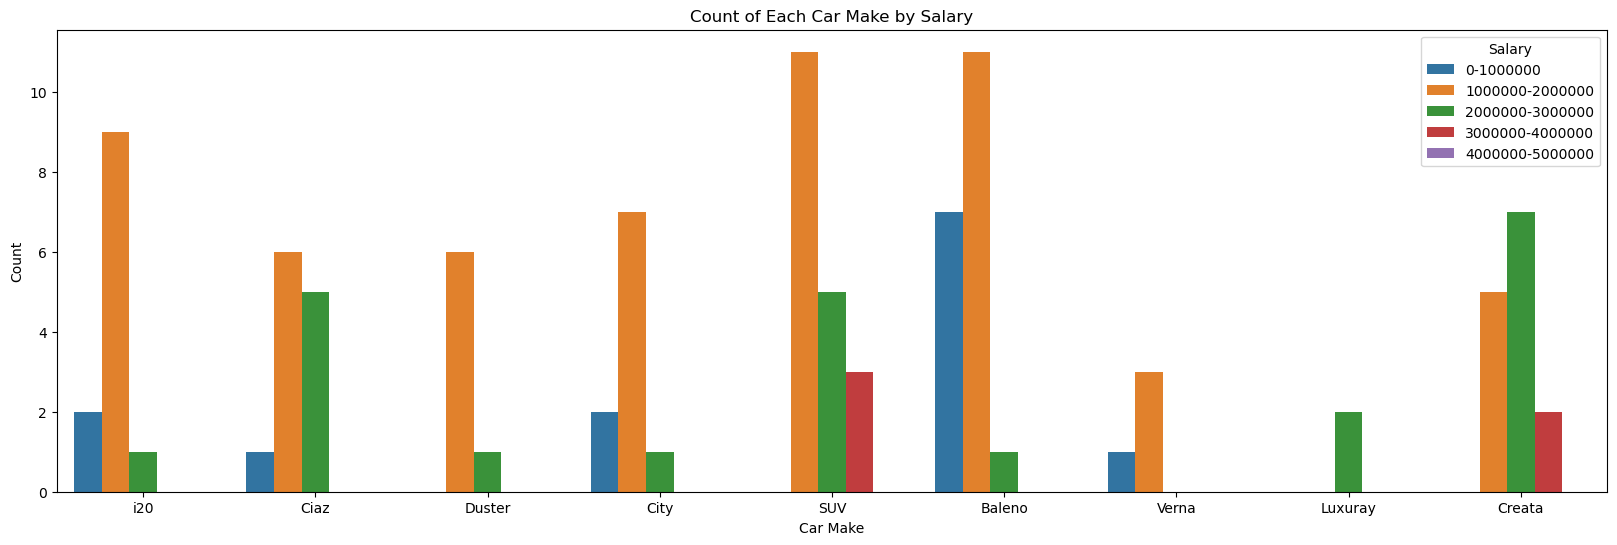

In [23]:
# Create bins for the Salary column
bins = [0, 1000000, 2000000, 3000000, 4000000, 5000000]
labels = ['0-1000000', '1000000-2000000', '2000000-3000000', '3000000-4000000', '4000000-5000000']

# Create a new column with the binned Salary
data['Salary_Bin'] = pd.cut(data['Salary'], bins=bins, labels=labels)

# Create the count plot
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=data, hue="Salary_Bin")
plt.title("Count of Each Car Make by Salary")
plt.xlabel("Car Make")
plt.ylabel("Count")
plt.legend(title="Salary")
plt.show()

/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

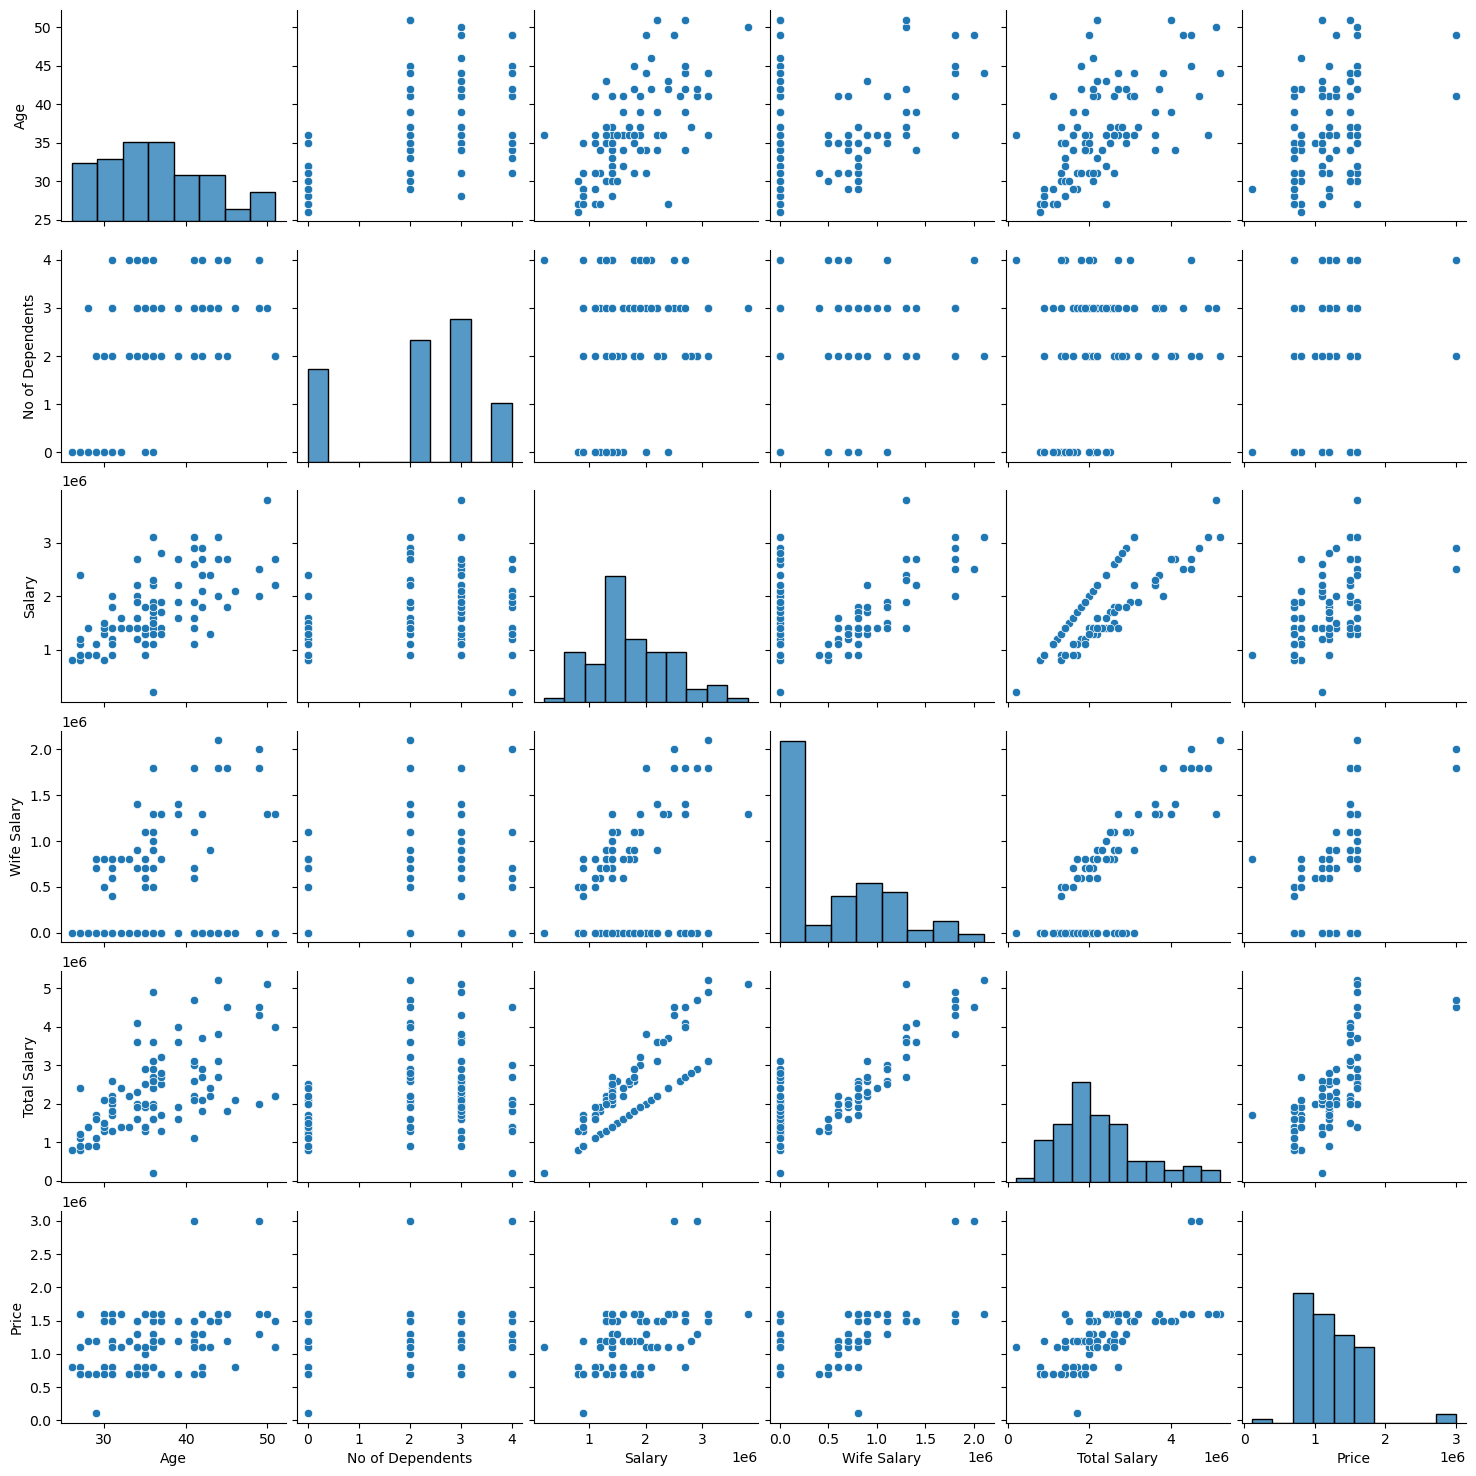

In [24]:
sns.pairplot(data)


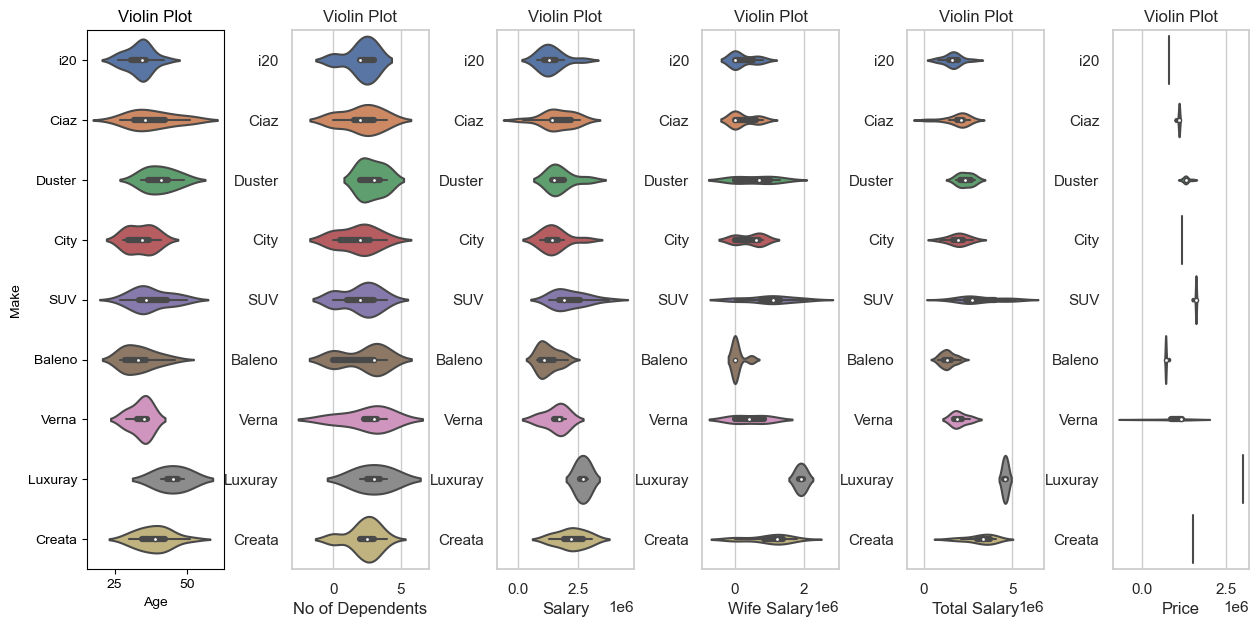

In [25]:
plt.figure(1,figsize=(15,7))
n = 0
for cols in ['Age','No of Dependents','Salary','Wife Salary','Total Salary','Price']:
    n += 1
    plt.subplot(1,6,n)
    sns.set(style = 'whitegrid')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x= cols, y = 'Make', data=data)
    plt.ylabel("Make" if n==1 else '')
    plt.title('Violin Plot')


A scatter plot of total salary against the price of the car owned.

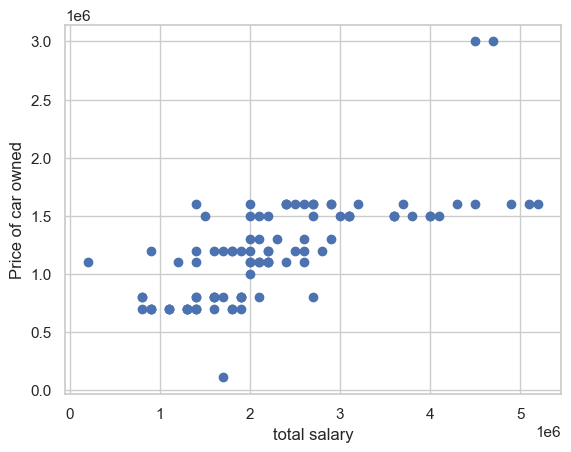

In [26]:

plt.xlabel('total salary')
plt.ylabel('Price of car owned')
plt.scatter(data['Total Salary'],data['Price'])

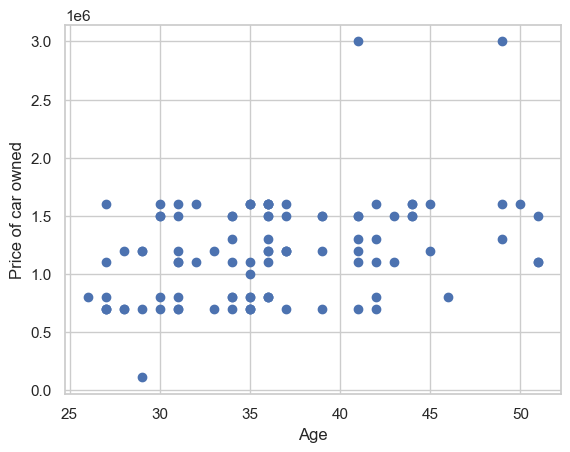

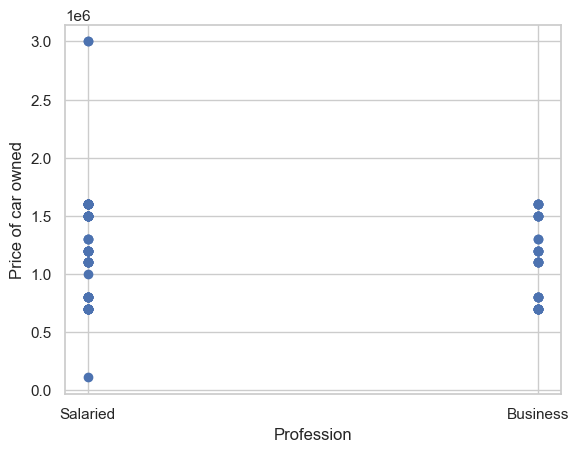

In [27]:
plt.xlabel('Age')
plt.ylabel('Price of car owned')
plt.scatter(data['Age'],data['Price'])
plt.show()
plt.xlabel('Profession')
plt.ylabel('Price of car owned')
plt.scatter(data['Profession'],data['Price'])
plt.show()

In [28]:

cols = ['Profession', 'Marrital Status', 'Education', 'Personal loan','House Loan','Wife Working']
#
# Encode labels of multiple columns at once
#
data[cols] = data[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
data.head()


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Salary_Bin
0,27,1,1,1,0,1,0,0,800000,0,800000,i20,800000,0-1000000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,Ciaz,1000000,1000000-2000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,Duster,1200000,1000000-2000000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,City,1200000,1000000-2000000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,SUV,1600000,1000000-2000000


In [29]:
data_price = data.drop('Make',axis=1)
data_price.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,Salary_Bin
0,27,1,1,1,0,1,0,0,800000,0,800000,800000,0-1000000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1000000,1000000-2000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,1200000,1000000-2000000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,1200000,1000000-2000000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,1600000,1000000-2000000


In [30]:
data_car = data.drop('Price',axis=1)
data_car.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Salary_Bin
0,27,1,1,1,0,1,0,0,800000,0,800000,i20,0-1000000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,Ciaz,1000000-2000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,Duster,1000000-2000000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,City,1000000-2000000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,SUV,1000000-2000000


In [31]:
le = LabelEncoder()
data_car.Make = le.fit_transform(data_car.Make)
data_car.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Salary_Bin
0,27,1,1,1,0,1,0,0,800000,0,800000,8,0-1000000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1,1000000-2000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,4,1000000-2000000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,2,1000000-2000000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,6,1000000-2000000


CLUSTERING AS PER THE PRICE OF THE VEHICLE OWNED

In [32]:
features = list(data_price.columns)
d = data_price[features]
features


['Age',
 'Profession',
 'Marrital Status',
 'Education',
 'No of Dependents',
 'Personal loan',
 'House Loan',
 'Wife Working',
 'Salary',
 'Wife Salary',
 'Total Salary',
 'Price',
 'Salary_Bin']

In [33]:
d['Price'] = d['Price'].apply(lambda x: (float(str(x).split('-')[0]) + float(str(x).split('-')[1])) / 2 if '-' in str(x) else float(x))

clustering_kmeans = KMeans(n_clusters=3)
d['groups'] = clustering_kmeans.fit_predict(d[['Price']])
d

/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,Salary_Bin,groups
0,27,1,1,1,0,1,0,0,800000,0,800000,800000.0,0-1000000,0
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1000000.0,1000000-2000000,0
2,45,0,0,0,4,1,1,0,1800000,0,1800000,1200000.0,1000000-2000000,2
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,1200000.0,1000000-2000000,2
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,1600000.0,1000000-2000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,0,1,0,0,0,0,0,2400000,0,2400000,1600000.0,2000000-3000000,2
95,50,1,0,1,3,0,0,1,3800000,1300000,5100000,1600000.0,3000000-4000000,2
96,51,0,0,0,2,1,1,0,2200000,0,2200000,1100000.0,2000000-3000000,2
97,51,1,0,1,2,0,0,1,2700000,1300000,4000000,1500000.0,2000000-3000000,2


Text(0, 0.5, 'Total salary')

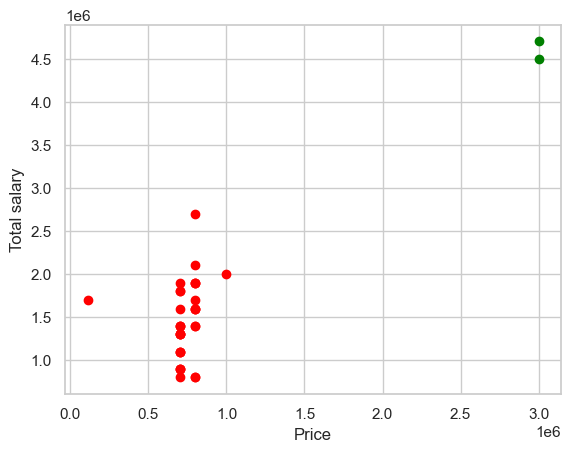

In [34]:
d1 = d[d.groups==1]
d0 = d[d.groups==0]
plt.scatter(d1.Price, d1['Total Salary'],color='green')
plt.scatter(d0.Price, d0['Total Salary'],color='red')
plt.xlabel('Price')
plt.ylabel('Total salary')

Scale the data using minmaxscaler

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the numeric columns
numeric_columns = ['Age', 'Salary', 'Wife Salary', 'Total Salary', 'Price']
for column in numeric_columns:
    x = d[column].values.reshape(-1, 1)
    x_scaled = scaler.fit_transform(x)
    d[column] = x_scaled

# Select only numeric columns for clustering
numeric_columns = d.select_dtypes(include=['int64', 'float64']).columns
d_numeric = d[numeric_columns]

# Perform K-means clustering
clustering_kmeans = KMeans(n_clusters=5)
d['clusters'] = clustering_kmeans.fit_predict(d_numeric)

d

/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,Salary_Bin,groups,clusters
0,0.04,1,1,1,0,1,0,0,0.166667,0.000000,0.12,0.238754,0-1000000,0,1
1,0.36,1,0,1,2,1,1,1,0.333333,0.285714,0.36,0.307958,1000000-2000000,0,2
2,0.76,0,0,0,4,1,1,0,0.444444,0.000000,0.32,0.377163,1000000-2000000,2,0
3,0.60,0,0,1,3,0,0,1,0.388889,0.285714,0.40,0.377163,1000000-2000000,2,4
4,0.20,1,0,1,2,1,0,1,0.444444,0.380952,0.48,0.515571,1000000-2000000,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.04,0,1,0,0,0,0,0,0.611111,0.000000,0.44,0.515571,2000000-3000000,2,1
95,0.96,1,0,1,3,0,0,1,1.000000,0.619048,0.98,0.515571,3000000-4000000,2,4
96,1.00,0,0,0,2,1,1,0,0.555556,0.000000,0.40,0.342561,2000000-3000000,2,3
97,1.00,1,0,1,2,0,0,1,0.694444,0.619048,0.76,0.480969,2000000-3000000,2,2


/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Total salary')

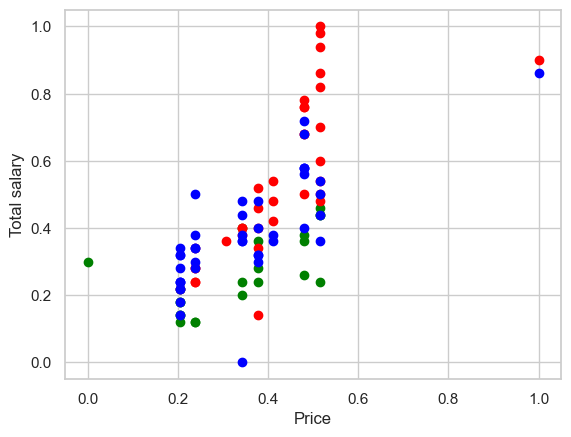

In [43]:
clustering_kmeans = KMeans(n_clusters=3)

# Select only numeric columns for clustering
numeric_columns = d.select_dtypes(include=['int64', 'float64']).columns
d_numeric = d[numeric_columns]

# Perform K-means clustering
d['clusters'] = clustering_kmeans.fit_predict(d_numeric)

d1 = d[d.clusters==1]
d0 = d[d.clusters==0]
d2 = d[d.clusters==2]

plt.scatter(d1.Price, d1['Total Salary'],color='green')
plt.scatter(d0.Price, d0['Total Salary'],color='red')
plt.scatter(d2.Price, d2['Total Salary'],color='blue')
plt.xlabel('Price')
plt.ylabel('Total salary')

In [44]:
clustering_kmeans.cluster_centers_

array([[ 4.97142857e-01,  8.00000000e-01,  5.71428571e-02,
         6.85714286e-01,  2.17142857e+00,  2.85714286e-01,
         4.85714286e-01,  6.85714286e-01,  5.17460317e-01,
         4.00000000e-01,  5.40571429e-01,  4.25605536e-01],
       [ 1.38181818e-01,  6.36363636e-01,  5.90909091e-01,
         5.45454545e-01,  8.88178420e-16,  1.81818182e-01,
        -5.55111512e-17,  4.09090909e-01,  2.89141414e-01,
         1.34199134e-01,  2.64545455e-01,  3.34853728e-01],
       [ 4.85714286e-01,  5.23809524e-01,  8.32667268e-17,
         4.76190476e-01,  3.33333333e+00,  4.28571429e-01,
         4.76190476e-01,  4.52380952e-01,  4.23280423e-01,
         1.96145125e-01,  3.87142857e-01,  3.54094579e-01]])

In [51]:
k_range = range(1,10)
#sum of squared error
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    
    # Select only numeric columns for clustering
    numeric_columns = d.select_dtypes(include=['int64', 'float64']).columns
    d_numeric = d[numeric_columns]
    
    km.fit(d_numeric)
    sse.append(km.inertia_)
sse

/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

[328.1896651277618,
 179.41407679878915,
 147.74296014452705,
 127.23365379933715,
 116.96991503280819,
 106.85050914518997,
 98.15291702062949,
 92.72265669954008,
 86.70335126724011]

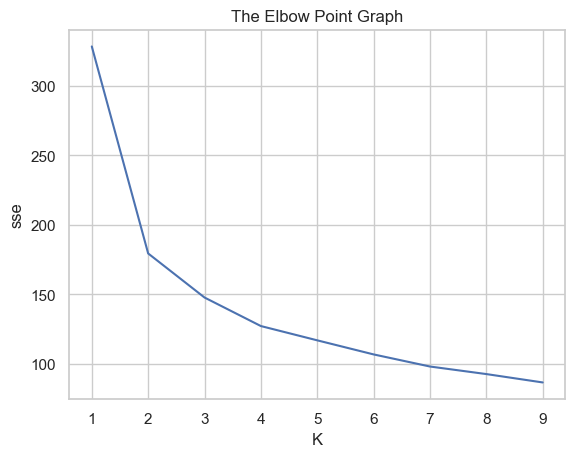

In [52]:
plt.title('The Elbow Point Graph')
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(k_range,sse)

Here elbow can be taken as three.

In [53]:
def plotseg(clus,Y, labels):  
    plt.scatter(clus[Y==0,0], clus[Y==0,1], s=10, c='blue', label='Cluster 1')
    plt.scatter(clus[Y==1,0], clus[Y==1,1], s=10, c='red', label='Cluster 2')
    plt.scatter(clus[Y==2,0], clus[Y==2,1], s=10, c='black', label='Cluster 3')

    plt.title('Customer_segments')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.show()


/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


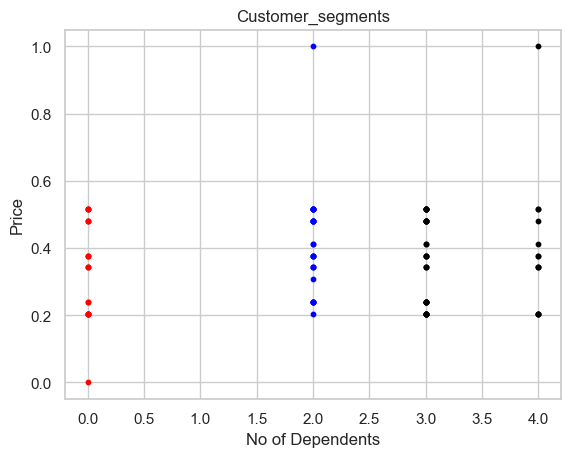

In [54]:
clus = d.loc[:,["No of Dependents","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["No of Dependents","Price"]) 

/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


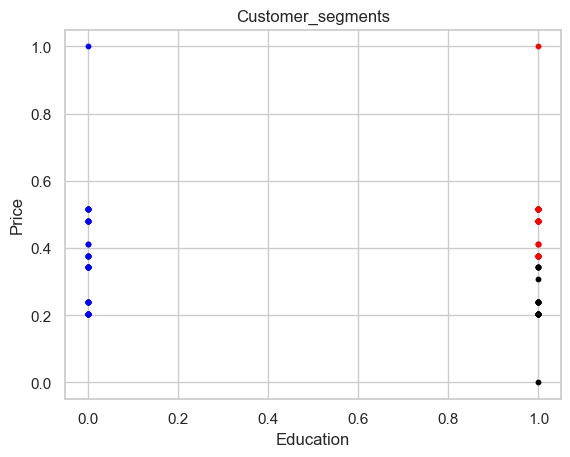

In [55]:

clus = d.loc[:,["Education","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Education","Price"]) 

/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


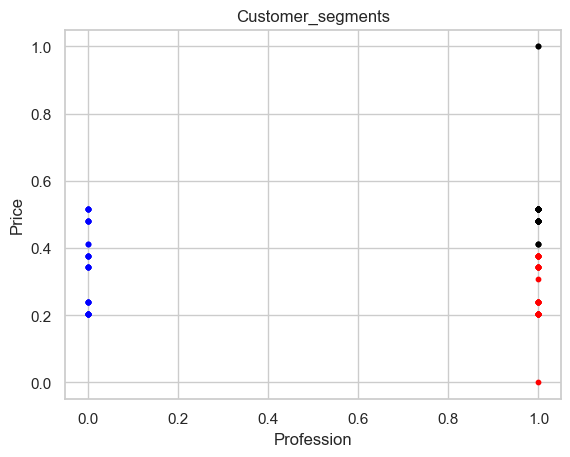

In [56]:

clus = d.loc[:,["Profession","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Profession","Price"])

/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


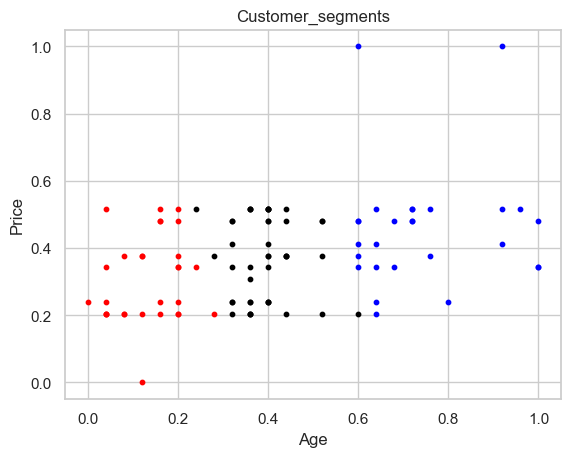

In [57]:
clus = d.loc[:,["Age","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Age","Price"]) 

/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


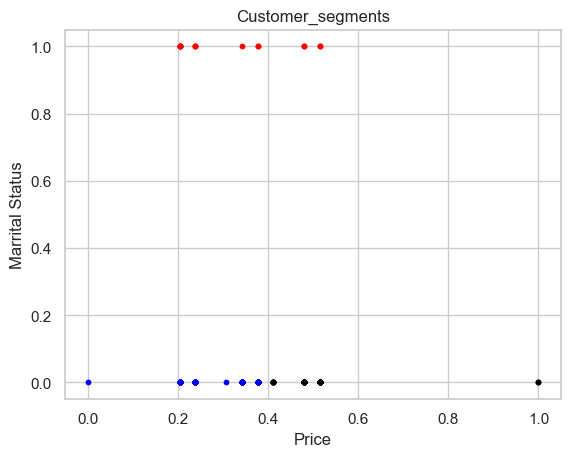

In [58]:
clus = d.loc[:,["Price","Marrital Status"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Price","Marrital Status"]) 

/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


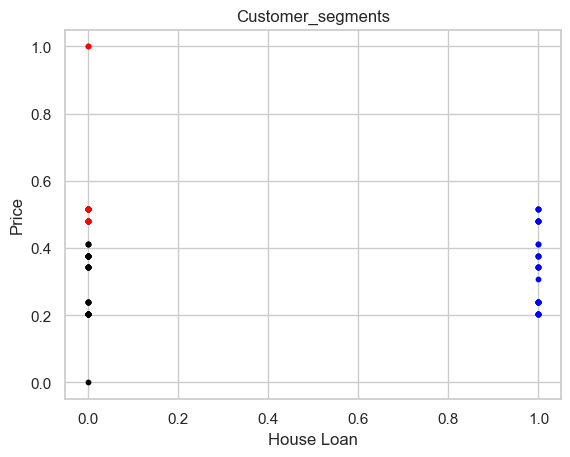

In [59]:

clus = d.loc[:,["House Loan","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["House Loan","Price"])

/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


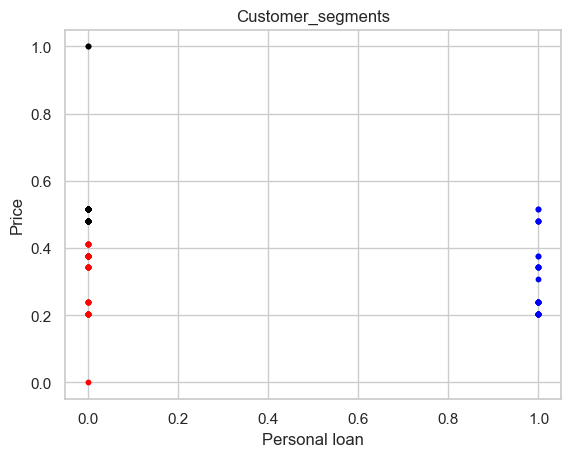

In [60]:
clus = d.loc[:,["Personal loan","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Personal loan","Price"])

/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


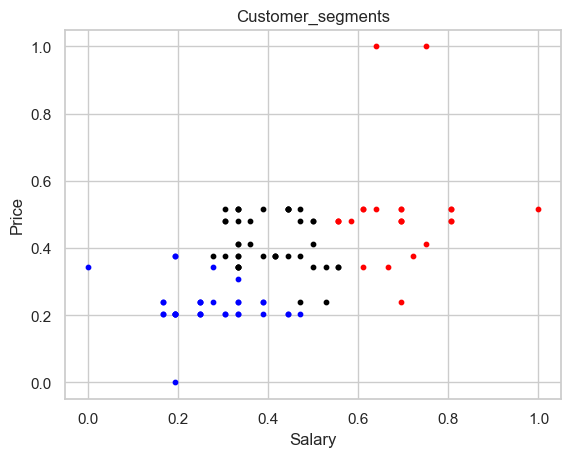

In [61]:
clus = d.loc[:,["Salary","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Salary","Price"])

/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


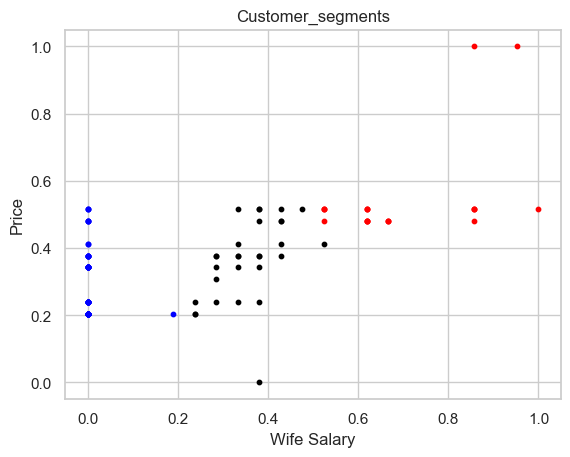

In [62]:
clus = d.loc[:,["Wife Salary","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Wife Salary","Price"]) 

In [66]:
# Select only numeric columns for clustering
numeric_columns = d.select_dtypes(include=['int64', 'float64']).columns
d_numeric = d[numeric_columns]

clustering_kmeans = KMeans(n_clusters=3)
d['clusters'] = clustering_kmeans.fit_predict(d_numeric)
d

/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,Salary_Bin,groups,clusters
0,0.04,1,1,1,0,1,0,0,0.166667,0.000000,0.12,0.238754,0-1000000,0,1
1,0.36,1,0,1,2,1,1,1,0.333333,0.285714,0.36,0.307958,1000000-2000000,0,2
2,0.76,0,0,0,4,1,1,0,0.444444,0.000000,0.32,0.377163,1000000-2000000,2,0
3,0.60,0,0,1,3,0,0,1,0.388889,0.285714,0.40,0.377163,1000000-2000000,2,0
4,0.20,1,0,1,2,1,0,1,0.444444,0.380952,0.48,0.515571,1000000-2000000,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.04,0,1,0,0,0,0,0,0.611111,0.000000,0.44,0.515571,2000000-3000000,2,1
95,0.96,1,0,1,3,0,0,1,1.000000,0.619048,0.98,0.515571,3000000-4000000,2,0
96,1.00,0,0,0,2,1,1,0,0.555556,0.000000,0.40,0.342561,2000000-3000000,2,2
97,1.00,1,0,1,2,0,0,1,0.694444,0.619048,0.76,0.480969,2000000-3000000,2,2


In [67]:
labels = clustering_kmeans.labels_
labels


array([1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2,
       2, 0, 2, 0, 2, 1, 1, 0, 2, 2, 2], dtype=int32)

3 dimentional visualization - Age, Salary, Price

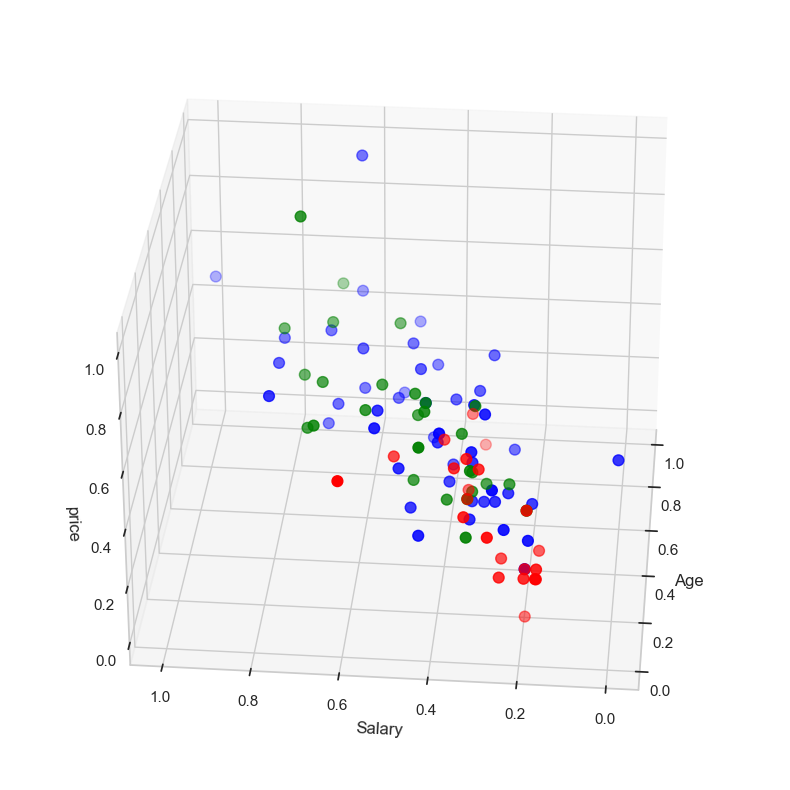

In [68]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(d.Age[labels == 0], d["Salary"][labels == 0], d["Price"][labels == 0],  c='blue', s=60)
ax.scatter(d.Age[labels == 1], d["Salary"][labels == 1], d["Price"][labels == 1],  c='red', s=60)
ax.scatter(d.Age[labels == 2], d["Salary"][labels == 2], d["Price"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Salary")
ax.set_zlabel('price')
plt.show()

3 -D PLOT - PRICE, NO OF DEPENDENTS, TOTAL SALARY

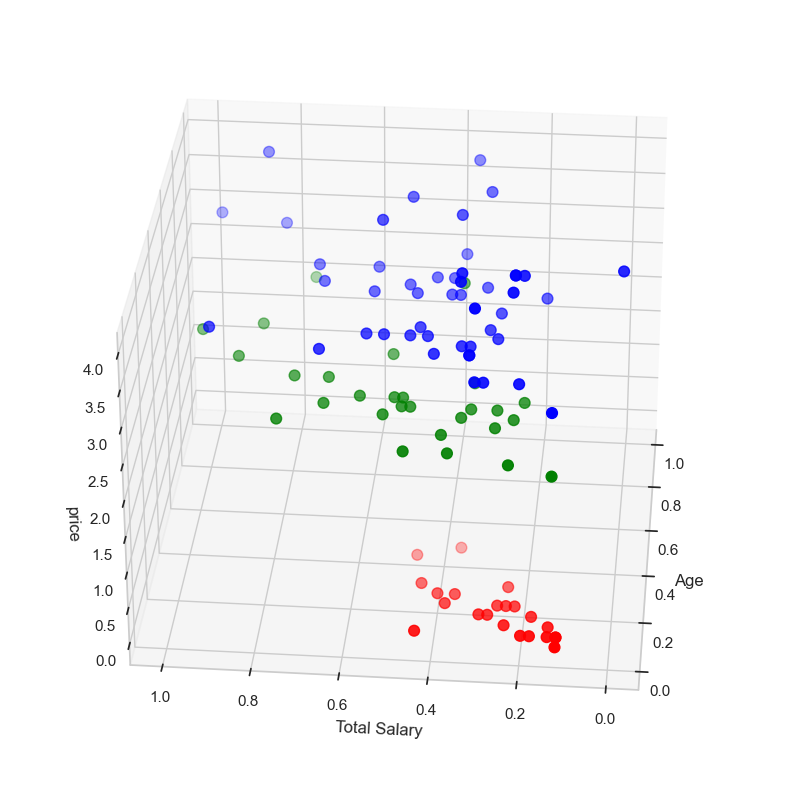

In [69]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(d.Age[labels == 0], d["Total Salary"][labels == 0], d["No of Dependents"][labels == 0],  c='blue', s=60)
ax.scatter(d.Age[labels == 1], d["Total Salary"][labels == 1], d["No of Dependents"][labels == 1],  c='red', s=60)
ax.scatter(d.Age[labels == 2], d["Total Salary"][labels == 2], d["No of Dependents"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Total Salary")
ax.set_zlabel('price')
plt.show()

Observations:

We found that 3 clusters groups can be formed from the data given(based on price of the vehicle) using the K-Means algorithm and Elbow Point Method.
While looking at the patterns, we find that as the Age increases the cost of the vehicle also rises.
Also, amount spent on the car goes up with the number of dependents. The same is true for salary field too.
The visualizations provided gives a clear idea about the patterns.

Clustering According to the type and model of the vehicle owned

In [70]:
feature = list(data_car.columns)
dc = data_car[feature] 
dc

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Salary_Bin
0,27,1,1,1,0,1,0,0,800000,0,800000,8,0-1000000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1,1000000-2000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,4,1000000-2000000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,2,1000000-2000000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,6,1000000-2000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,0,1,0,0,0,0,0,2400000,0,2400000,6,2000000-3000000
95,50,1,0,1,3,0,0,1,3800000,1300000,5100000,6,3000000-4000000
96,51,0,0,0,2,1,1,0,2200000,0,2200000,1,2000000-3000000
97,51,1,0,1,2,0,0,1,2700000,1300000,4000000,3,2000000-3000000


In [72]:
x = dc['Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
dc['Salary']= x_scaled


x = dc['Age'].values.reshape(-1, 1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
dc['Age']= x_scaled


x = dc['Wife Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
dc['Wife Salary']= x_scaled


x = dc['Total Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
dc['Total Salary']= x_scaled
dc

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Salary_Bin
0,0.04,1,1,1,0,1,0,0,0.166667,0.000000,0.12,8,0-1000000
1,0.36,1,0,1,2,1,1,1,0.333333,0.285714,0.36,1,1000000-2000000
2,0.76,0,0,0,4,1,1,0,0.444444,0.000000,0.32,4,1000000-2000000
3,0.60,0,0,1,3,0,0,1,0.388889,0.285714,0.40,2,1000000-2000000
4,0.20,1,0,1,2,1,0,1,0.444444,0.380952,0.48,6,1000000-2000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.04,0,1,0,0,0,0,0,0.611111,0.000000,0.44,6,2000000-3000000
95,0.96,1,0,1,3,0,0,1,1.000000,0.619048,0.98,6,3000000-4000000
96,1.00,0,0,0,2,1,1,0,0.555556,0.000000,0.40,1,2000000-3000000
97,1.00,1,0,1,2,0,0,1,0.694444,0.619048,0.76,3,2000000-3000000


In [74]:
k_range1 = range(1,10)
#sum of squared error
ssec = []
numeric_columns = dc.select_dtypes(include=['int64', 'float64']).columns
dc_numeric = dc[numeric_columns]

for k in k_range1:
    km = KMeans(n_clusters=k)
    km.fit(dc_numeric)
    ssec.append(km.inertia_)
ssec

/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

[1076.5680399367827,
 480.40438659921205,
 375.31955215066057,
 288.1278894579031,
 240.89639833605784,
 202.73577880733686,
 188.1448834516637,
 173.42131361240038,
 167.54098562479209]

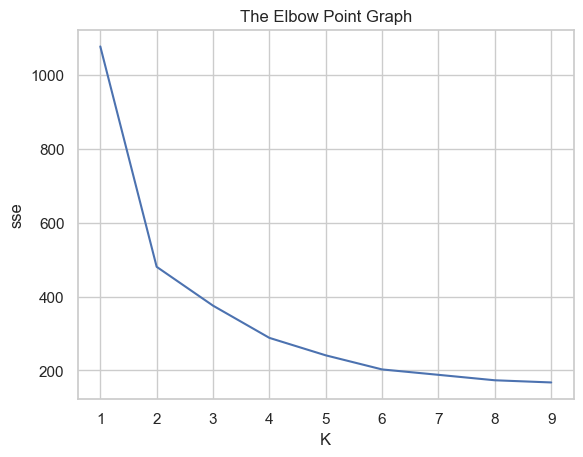

In [75]:
plt.title('The Elbow Point Graph')
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(k_range1,ssec)

Here the elbow point can be taken an 2

In [76]:

def plotsegm(clus,Y, labels):  
    plt.scatter(clus[Y==0,0], clus[Y==0,1], s=10, c='blue', label='Cluster 1')
    plt.scatter(clus[Y==1,0], clus[Y==1,1], s=10, c='red', label='Cluster 2')

    plt.title('Customer_segments')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.show()

/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


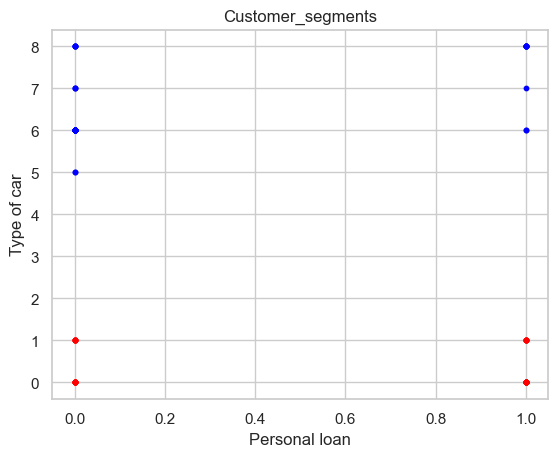

In [77]:
clus = dc.loc[:,["Personal loan","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Personal loan","Type of car"])

/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


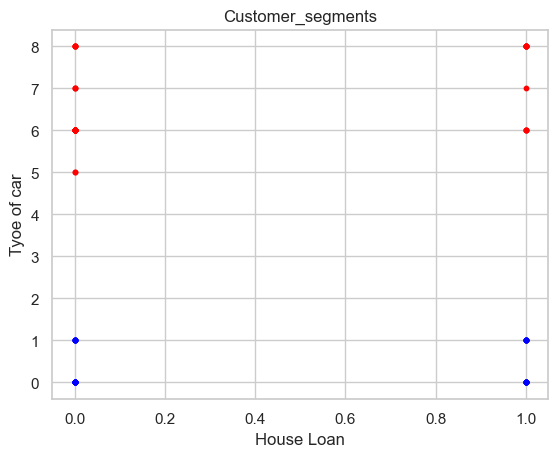

In [78]:
clus = dc.loc[:,["House Loan","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["House Loan","Tyoe of car"])

/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


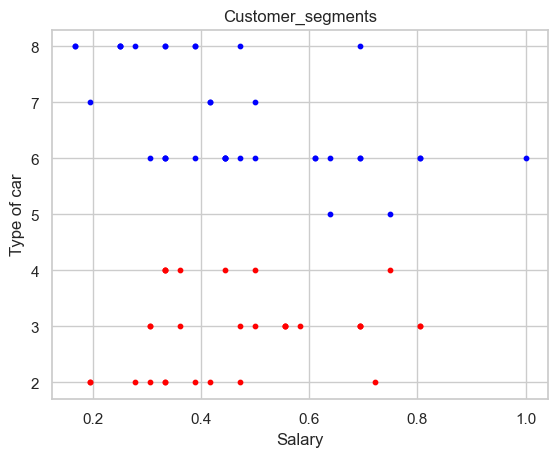

In [79]:
clus = dc.loc[:,["Salary","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Salary","Type of car"])

/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


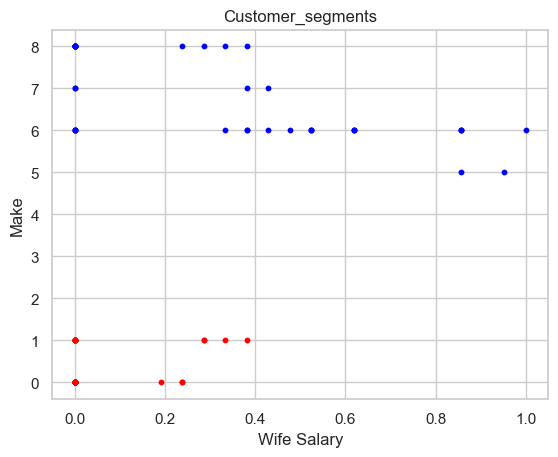

In [80]:
clus = dc.loc[:,["Wife Salary","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Wife Salary","Make"])

/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


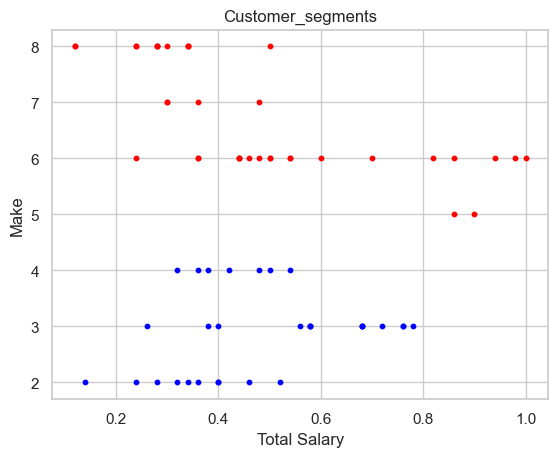

In [81]:
clus = dc.loc[:,["Total Salary","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Total Salary","Make"])

/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


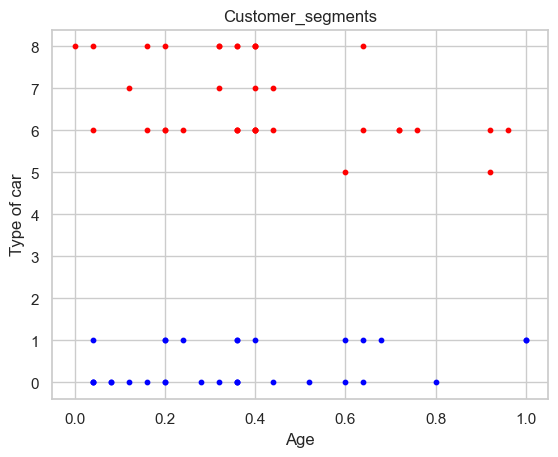

In [82]:
#Age	Profession	Marrital Status	Education	No of Dependents	
clus = dc.loc[:,["Age","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Age","Type of car"])

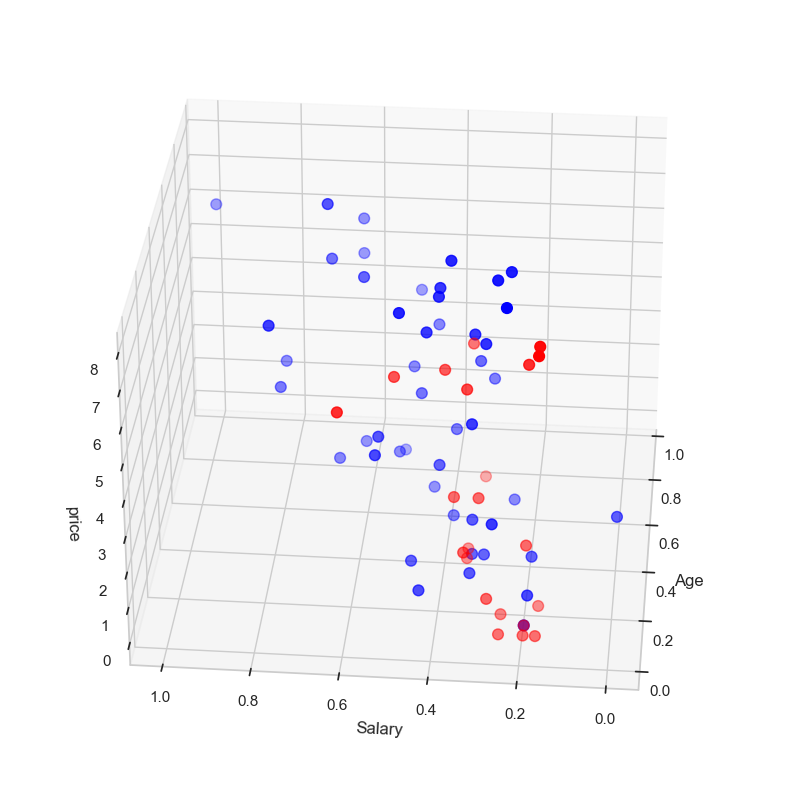

In [83]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(dc.Age[labels == 0], dc["Salary"][labels == 0], dc["Make"][labels == 0],  c='blue', s=60)
ax.scatter(dc.Age[labels == 1], dc["Salary"][labels == 1], dc["Make"][labels == 1],  c='red', s=60)
#ax.scatter(dc.Age[labels == 2], dc["Salary"][labels == 2], dc["Make"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Salary")
ax.set_zlabel('price')
plt.show()

Displaying the rows in same clusters at one place(According to price)

In [84]:
p=d[d.clusters==1]
p

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,Salary_Bin,groups,clusters
0,0.04,1,1,1,0,1,0,0,0.166667,0.000000,0.12,0.238754,0-1000000,0,1
12,0.12,1,0,1,0,0,0,1,0.194444,0.380952,0.30,0.000000,0-1000000,0,1
16,0.00,1,1,1,0,0,0,0,0.166667,0.000000,0.12,0.238754,0-1000000,0,1
17,0.04,1,1,0,0,1,0,1,0.166667,0.000000,0.12,0.204152,0-1000000,0,1
19,0.16,1,0,0,0,0,0,1,0.166667,0.238095,0.22,0.204152,0-1000000,0,1
36,0.12,0,0,1,0,0,0,1,0.194444,0.333333,0.28,0.377163,0-1000000,2,1
37,0.16,1,0,1,0,0,0,1,0.305556,0.380952,0.38,0.480969,1000000-2000000,2,1
38,0.16,0,1,1,0,0,0,0,0.333333,0.000000,0.24,0.515571,1000000-2000000,2,1
39,0.20,1,0,0,0,0,0,1,0.333333,0.380952,0.40,0.342561,1000000-2000000,2,1
41,0.24,0,0,1,0,0,0,0,0.333333,0.000000,0.24,0.342561,1000000-2000000,2,1


In [85]:
p.shape

(22, 15)

In [86]:
q=d[d.clusters==0]
q

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,Salary_Bin,groups,clusters
2,0.76,0,0,0,4,1,1,0,0.444444,0.000000,0.32,0.377163,1000000-2000000,2,0
3,0.60,0,0,1,3,0,0,1,0.388889,0.285714,0.40,0.377163,1000000-2000000,2,0
5,0.08,1,0,0,3,1,1,0,0.194444,0.000000,0.14,0.204152,0-1000000,0,0
6,0.20,1,0,0,4,0,0,1,0.277778,0.285714,0.32,0.377163,1000000-2000000,2,0
7,0.28,0,0,1,4,0,0,0,0.333333,0.000000,0.24,0.204152,1000000-2000000,0,0
8,0.32,0,0,1,4,0,0,0,0.500000,0.000000,0.36,0.342561,1000000-2000000,2,0
9,0.32,1,0,0,3,1,1,1,0.277778,0.333333,0.34,0.238754,1000000-2000000,0,0
10,0.36,1,0,1,4,0,0,1,0.305556,0.333333,0.36,0.515571,1000000-2000000,2,0
11,0.36,1,0,0,4,1,1,0,0.333333,0.000000,0.24,0.204152,1000000-2000000,0,0
14,0.20,0,0,0,3,1,1,1,0.194444,0.190476,0.22,0.204152,0-1000000,0,0


In [87]:
q.shape

(48, 15)

In [88]:
r=d[d.clusters==2]
r

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,Salary_Bin,groups,clusters
1,0.36,1,0,1,2,1,1,1,0.333333,0.285714,0.36,0.307958,1000000-2000000,0,2
4,0.20,1,0,1,2,1,0,1,0.444444,0.380952,0.48,0.515571,1000000-2000000,2,2
13,0.16,0,1,1,2,1,0,0,0.333333,0.000000,0.24,0.238754,1000000-2000000,0,2
18,0.12,1,1,1,2,0,0,0,0.194444,0.000000,0.14,0.377163,0-1000000,2,2
25,0.36,1,0,0,2,0,0,1,0.444444,0.523810,0.54,0.515571,1000000-2000000,2,2
29,0.40,1,0,1,2,0,0,1,0.444444,0.428571,0.50,0.515571,1000000-2000000,2,2
44,0.32,1,0,1,2,1,1,0,0.388889,0.000000,0.28,0.238754,1000000-2000000,0,2
47,0.40,0,0,0,2,0,1,1,0.361111,0.523810,0.48,0.411765,1000000-2000000,2,2
48,0.40,1,0,1,2,0,1,1,0.250000,0.238095,0.28,0.238754,1000000-2000000,0,2
54,0.60,1,0,0,2,0,0,1,0.750000,0.857143,0.90,1.000000,2000000-3000000,1,2


In [89]:
r.shape

(29, 15)